In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing as mp
import os
import healpy as hp
import requests

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.io.votable import parse
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs import NoConvergence
from astropy.table import Table, vstack
from astroquery.imcce import Skybot
from astroquery.jplhorizons import Horizons

from plottingTools import getPlots
from plottingTools import FindObjects

pd.options.mode.chained_assignment = None  # default='warn'

In [18]:
allObjectData = {'legend':['name','v_mag','[v_x,v_y]','speed','angle','[x_pixel,y_pixel]']}
for pgNum in range(11,12):
    try:
        print('Making stamps for Pointing Group {}'.format(pgNum))
        findObjects = FindObjects()
        PointingGroups, KBOList = findObjects.getKBOList(pgNum)
        if len(KBOList)>0:
            pgObjectData = getPlots(PointingGroups, pgNum, KBOList, findObjects, fileType='DeepDiff')
            allObjectData = {**allObjectData, **pgObjectData}
        else:
            print('No KBOs in the Pointing Group')
    except:
        print('Could not process Pointing Group {}'.format(pgNum))
        
#with open('known_objects/allObjectData_4.pkl', 'wb') as f:
#        pickle.dump(allObjectData, f)

Making stamps for Pointing Group 11
2003 HC57 is on ccd 29
2003 HY56 is on ccd 6
2003 FZ129 is not on any ccd
2014 DT143 is not on any ccd
Could not process Pointing Group 11


In [ ]:
allObjectData = {'legend':['name','v_mag','[v_x,v_y]','speed','angle','[x_pixel,y_pixel]']}
for pgNum in range(10,150):
    try:
        print('Making stamps for Pointing Group {}'.format(pgNum))
        findObjects = FindObjects()
        PointingGroups, KBOList = findObjects.getKBOList(pgNum)
        if len(KBOList)>0:
            pgObjectData, _ = getPlots(PointingGroups, pgNum, KBOList, findObjects,
                                    dataPath='/astro/store/epyc/users/smotherh/pointing_groups/Pointing_Group_{0:03}',
                                    fileType='DeepDiff')
            #print(pgObjectData)
            allObjectData = {**allObjectData, **pgObjectData}
        else:
            print('No KBOs in the Pointing Group')
    except:
        print('Coould not process Pointing Group {}'.format(pgNum))
#with open('known_objects/aligned_object_data.pkl', 'wb') as f:
#        pickle.dump(allObjectData, f)

Making stamps for Pointing Group 10
2014 DT143 is not on any ccd
2000 FE8 is not on any ccd
Making stamps for Pointing Group 11
2003 HC57 is on ccd 29
2003 HY56 is on ccd 6
2003 FZ129 is not on any ccd
2014 DT143 is not on any ccd
Making stamps for Pointing Group 12
2002 FP7 is not on any ccd
2005 EO302 is not on any ccd
2000 FE8 is not on any ccd
Making stamps for Pointing Group 13
Coould not process Pointing Group 13
Making stamps for Pointing Group 14
2003 HJ57 is not on any ccd
Making stamps for Pointing Group 15
No KBOs in the Pointing Group
Making stamps for Pointing Group 16
Coould not process Pointing Group 16
Making stamps for Pointing Group 17
Coould not process Pointing Group 17
Making stamps for Pointing Group 18
2003 HE57 is not on any ccd
Making stamps for Pointing Group 19
Coould not process Pointing Group 19
Making stamps for Pointing Group 20
Coould not process Pointing Group 20
Making stamps for Pointing Group 21
Coould not process Pointing Group 21
Making stamps for 

/astro/store/epyc/users/smotherh/LoriAllen/pointing_metadata/plottingTools.py:673: RuntimeWarning: invalid value encountered in true_divide
  s /= np.sum(s)


2013 GP136 is not on any ccd
2013 GA137 is on ccd 50
2013 GS136 is not on any ccd
2013 GO137 is not on any ccd
2013 GU136 is not on any ccd
2013 GD137 is not on any ccd
2005 GZ206 is not on any ccd
2013 GP137 is not on any ccd
Making stamps for Pointing Group 27
2001 FQ185 is not on any ccd
Making stamps for Pointing Group 28
No KBOs in the Pointing Group
Making stamps for Pointing Group 29
2014 FT71 is on ccd 54
2014 FY71 is not on any ccd
Making stamps for Pointing Group 30
2014 FT71 is not on any ccd
Making stamps for Pointing Group 31
No KBOs in the Pointing Group
Making stamps for Pointing Group 32
2014 FT71 is not on any ccd
Making stamps for Pointing Group 33
Coould not process Pointing Group 33
Making stamps for Pointing Group 34
2014 FW71 is on ccd 16
Coould not process Pointing Group 34
Making stamps for Pointing Group 35
Coould not process Pointing Group 35
Making stamps for Pointing Group 36
Coould not process Pointing Group 36
Making stamps for Pointing Group 37
1998 FS144

In [4]:
KBOList

Number,Name,RA,DEC,Type,V,posunc,centerdist,RA_rate,DEC_rate,geodist,heliodist,alpha,elong,x,y,z,vx,vy,vz,epoch
,,deg,deg,,mag,arcsec,arcsec,arcsec / h,arcsec / h,AU,AU,deg,deg,AU,AU,AU,AU / d,AU / d,AU / d,d
int64,str12,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
469509,2003 HC57,209.18501291666664,-12.370871666666668,KBO>Resonant>9:5,22.1,0.454,1112.313,-2.8228,1.035,41.75104321572,42.75584753118,0.03,178.76,-36.451424753,-20.383404757,-9.160191165,0.001524978,-0.002028556,-0.000829324,2456770.0
488644,2003 HY56,209.0168833333333,-11.654200277777779,KBO>Classical>Main,24.1,0.427,2806.364,-2.8811,1.022,41.06512744445,42.06976620256,0.04,178.41,-36.017201029,-20.005706435,-8.510775767,0.001450578,-0.0020062,-0.001000299,2456770.0
-1,2003 FZ129,207.99989666666661,-11.751290555555556,KBO>Detached,23.2,0.561,3905.97,-3.0326,1.036,37.7179602861,38.72201841247,0.07,177.52,-33.452005298,-17.833073214,-7.89702775,0.001330631,-0.002566328,-0.001468463,2456770.0
533210,2014 DT143,209.63958749999998,-13.440474166666666,KBO>SDO,22.5,0.349,4551.666,-3.0747,1.516,35.19807897664,36.20289147313,0.04,178.69,-30.601915826,-17.426727891,-8.397197392,0.001965355,-0.003075023,0.000384299,2456770.0


In [15]:
foo = np.zeros([10,10])
foo[5:9,5:7] = 0
np.shape(np.where(foo == 1))[1]

0

In [2]:
allObjectData = {'legend':['name','v_mag','[v_x,v_y]','speed','angle','[x_pixel,y_pixel]']}
for pgNum in range(11,12):
    print('Making stamps for Pointing Group {}'.format(pgNum))
    findObjects = FindObjects()
    PointingGroups, KBOList = findObjects.getKBOList(pgNum)
    if len(KBOList)>0:
        pgObjectData, _ = getPlots(PointingGroups, pgNum, KBOList, findObjects,
                                dataPath='/astro/store/epyc/users/smotherh/pointing_groups/Pointing_Group_{0:03}',
                                fileType='DeepDiff')
        #print(pgObjectData)
        allObjectData = {**allObjectData, **pgObjectData}
    else:
        print('No KBOs in the Pointing Group')
#with open('known_objects/aligned_object_data.pkl', 'wb') as f:
#        pickle.dump(allObjectData, f)

Making stamps for Pointing Group 11
2003 HC57 is on ccd 29


/astro/store/epyc/users/smotherh/LoriAllen/pointing_metadata/plottingTools.py:652: RuntimeWarning: invalid value encountered in true_divide
  s /= np.sum(s)


2003 HY56 is on ccd 6
2003 FZ129 is not on any ccd
2014 DT143 is not on any ccd


In [19]:
allFindMotion[0]['MJD'] = Time(allFindMotion[0]['datetime_jd'],format='jd').mjd
allFindMotion[0]['targetname','datetime_str','MJD', 'RA', 'DEC'].write('2003_HC57.csv', format='csv')

In [8]:
allFindMotion

[]

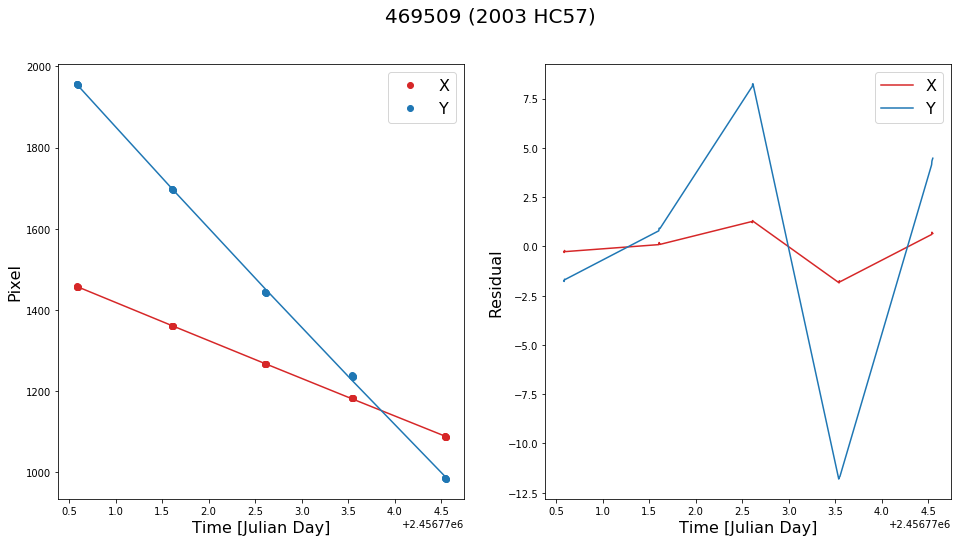

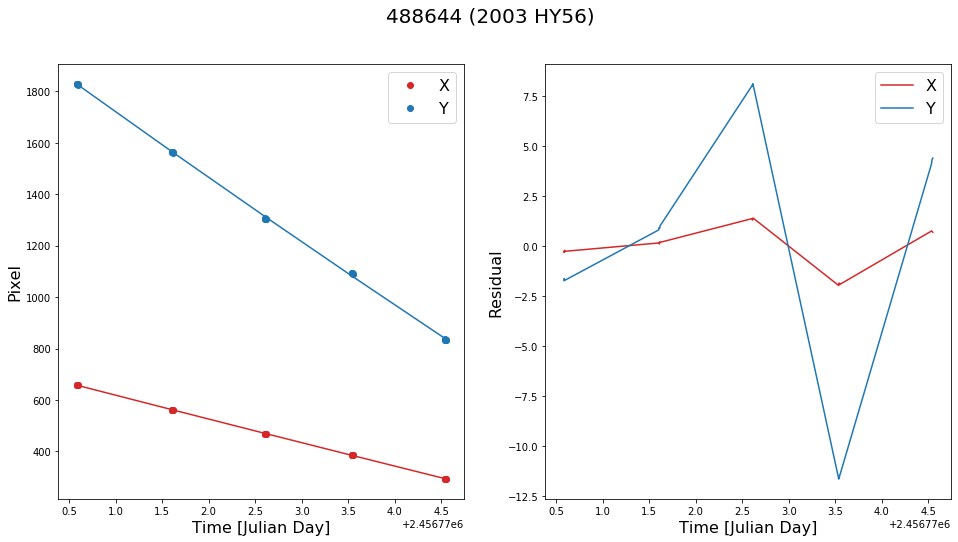

In [13]:
for i in range(len(allFindMotion[0:2])):
    plotTrajectoryResiduals(allFindMotion[i], order=2)


In [11]:
def plotTrajectoryResiduals(findMotion, order=1):
    x  = findMotion['x_pixel'].data
    y = findMotion['y_pixel'].data
    times = findMotion['times'].data
    name = findMotion['targetname'][0]
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    plt.suptitle(name,fontsize=20)
    ax[0].plot(times,x,'.',color='tab:red',ms=12)
    ax[0].plot(times,y,'.',color='tab:blue',ms=12)
    ax[0].plot(np.unique(times), np.poly1d(np.polyfit(times, x, order))(np.unique(times)),'tab:red')
    ax[0].plot(np.unique(times), np.poly1d(np.polyfit(times, y, order))(np.unique(times)),'tab:blue')
    ax[0].set_xlabel('Time [Julian Day]', fontsize=16)
    ax[0].set_ylabel('Pixel', fontsize=16)
    ax[0].legend(['X', 'Y'], fontsize=16)
    ax[1].plot(times,(np.poly1d(np.polyfit(times,x, order))(times)-x),'tab:red')
    ax[1].plot(times,(np.poly1d(np.polyfit(times,y, order))(times)-y),'tab:blue')
    ax[1].legend(['X', 'Y'], fontsize=16)
    ax[1].set_xlabel('Time [Julian Day]', fontsize=16)
    ax[1].set_ylabel('Residual', fontsize=16)


In [30]:
ra = KBOList['RA']
dec = KBOList['DEC']
ra_rate = KBOList['RA_rate']
dec_rate = KBOList['DEC_rate']
i=0
c = SkyCoord(ra[i],dec[i],pm_ra=ra_rate[i], pm_dec=dec_rate[i], frame='icrs', differential_type=SphericalDifferential)
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (209.18501292, -12.37087167)
 (pm_ra, pm_dec) in mas / yr
    (-24744664.8, 9072810.)>


In [6]:
def matchSingleVisitCcd(self, visitDF, visit, ccd, dataPath, verbose=False):
    """Match the MPC object RA and DEC to pixel coorinates in the DECam NEO Survey
    Inputs-
        visitDF : Dataframe from runMPCRequests.
            It should only contain values from a single visit, although it may
            have multiple objects in that visit.
            Can be cut on magnitude, etc. if desired
        dataPath : Path to the DECam NEO Survey warps.
        verbose : Verbosity flag for print output

    Outputs-
        visitDF : Updated Dataframe with object->pixel relationships.
    """    

    i=ccd
    if self.fileType == 'DeepDiff':
        fitsPath = '%s/warps/%02i/%s.fits' % (dataPath,i,visit)
    elif self.fileType == 'Calexp':
        fitsPath = '{path}/processed_data/rerun/rerun_processed_data/{visit_id:07d}/calexp/calexp-{visit_id:07d}_{ccd_num:02d}.fits'.format(
            path=dataPath,visit_id=visit,ccd_num=i)
    else:
        ValueError('Please select DeepDiff or Calexp fileType')
    if verbose:
        print('Processing visit {}.'.format(visit))
    # Iterate over all moving objects (rows) in the visitDF
    obj_row = visitDF[visitDF['visit']==visit]
    # Set ra and dec and use them to generate a SkyCoord object
    ra = obj_row['RA']
    dec = obj_row['DEC']
    c = SkyCoord(ra, dec, frame='icrs', unit=(u.deg, u.deg))
    # Iterate over CCDs
    # CCD 2 and 61 are broken on DECam and should be skipped
    if (i==2 or i==61):
        return(obj_row)
    if verbose:
        print('Processing ccd {} of 62.'.format(i))
    # Calculate the pixel values for the objects in the visit
    try:
        # Load only the fits header, changing the path for varying CCDs
        fitsHeader = fits.getheader(fitsPath,1)
        # Load the world coordinate system and find the pixel values
        w = WCS(fitsHeader)
        x_pix, y_pix = c.to_pixel(w)
        # If the returned pixel values are on the given CCD, save the object
        if (x_pix < 2010) and (x_pix > 0) and (y_pix < 4100) and (y_pix > 0):
            if verbose:
                print(obj_row['name'], ra, dec)
                print(x_pix, y_pix)
            obj_row['x_pixel'] = x_pix
            obj_row['y_pixel'] = y_pix
            obj_row['ccd'] = i

dict_keys(['legend', 'pg023_ccd35', 'pg023_ccd48', 'pg023_ccd43', 'pg023_ccd32', 'pg023_ccd24', 'pg023_ccd32_1'])


In [ ]:
with open('known_objects/allObjectData.pkl', 'rb') as f:
        allObjectData = pickle.load(f)
print(allObjectData['pg053_ccd03'])

In [35]:
from skimage import measure
center_thresh = 0.03
x_peak_offset, y_peak_offset = [2,2]
stamps = coaddData
s = stamps - np.min(stamps)
s /= np.sum(s)
s = np.array(s, dtype=np.dtype('float64')).reshape(21,21)
mom = measure.moments_central(s, center=(10,10))
mom_list = [mom[2, 0], mom[0, 2], mom[1, 1], mom[1, 0], mom[0, 1]]
peak_1, peak_2 = np.where(s == np.max(s))

In [36]:
print(mom_list)
print(peak_1, peak_2)

[25.14556224422995, 25.078051695396425, 1.9718366023153067, 0.2750369818531908, 0.24856384735903703]
[11] [11]


In [3]:
fitsPath='/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_011/warps/06/303605.fits'
fitsHeader=fits.getheader(fitsPath)
hdul = fits.open(fitsPath)
fitsHeader.get('DIMMSEE')

0.5

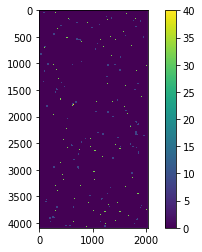

In [9]:
mask_bits_dict = {'BAD': 0, 'CLIPPED': 9, 'CR': 3, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4,
         'INEXACT_PSF': 10, 'INTRP': 2, 'NOT_DEBLENDED': 11, 'NO_DATA': 8, 'REJECTED': 12,
         'SAT': 1, 'SENSOR_EDGE': 13, 'SUSPECT': 7}
mask_type = ['BAD', 'CR','DETECTED']
mask_data = hdul[2].data.astype(int)

bitmask = 0
for bit in mask_type:
    bitmask += 2**mask_bits_dict[bit]
plt.imshow(mask_data.astype(int) & bitmask)
plt.colorbar()